# Data Science
# Capstone Project: Predictive Modelling for COVID-19 in Public Health
<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://nitda.gov.ng/wp-content/uploads/2023/10/Group-5-1024x574.png"  style="display: block; margin-left: auto; margin-right: auto;"; width="600", height="200"/>
</div>

**Case Scenario**

In response to the COVID-19 pandemic, public health organizations have faced
immense challenges in predicting the spread of the virus and understanding key
factors that influence transmission and patient outcomes. Imagine you have been
hired as a data scientist by a public health organization, "HealthGuard Analytics," to
build a predictive modeling system. The organization requires actionable insights to
inform policies, anticipate future outbreaks, and improve health resource allocation.
Using historical COVID-19 data, you will conduct data cleaning, perform exploratory
data analysis (EDA), and develop predictive models to forecast COVID-19 trends.
You will present your findings through visualizations and provide a final report
summarizing insights and recommendations for public health responses.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from scipy.stats import randint
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.cm as cm
from tabulate import tabulate



# Setting the style for the plot
sns.set(style='whitegrid')

In [4]:
# Load the CSV file
file_path = r'C:\Users\segun\OneDrive\Desktop\3mtt assignment folder\country_wise_latest.csv'
df = pd.read_csv(file_path, encoding='ascii')

# Display the head of the dataframe to understand its structure
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


# Data Preparation

In [6]:
# Getting information on the columns 
print(df.columns)

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')


In [7]:
# Getting information on data type and column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

# Explanation
Data Completeness: All columns have 187 non-null entries, indicating that there are no missing values in the dataset.
Data Types: The columns contain a mix of data types, including integers (int64), floating-point numbers (float64), and text (object).
Metrics: The DataFrame includes various metrics related to COVID-19 cases, deaths, recoveries, and rates, providing a comprehensive view of the pandemic's impact across different countries and regions.

In [9]:
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

# univariate analysis

In [11]:
# Getting a quick statistical insight on the numerical data types
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,187.0,8.813094e+04,383318.663831,10.00,1114.000,5059.00,40460.500,4290259.00
Deaths,187.0,3.497519e+03,14100.002482,0.00,18.500,108.00,734.000,148011.00
Recovered,187.0,5.063148e+04,190188.189643,0.00,626.500,2815.00,22606.000,1846641.00
Active,187.0,3.400194e+04,213326.173371,0.00,141.500,1600.00,9149.000,2816444.00
New cases,187.0,1.222957e+03,5710.374790,0.00,4.000,49.00,419.500,56336.00
New deaths,187.0,2.895722e+01,120.037173,0.00,0.000,1.00,6.000,1076.00
New recovered,187.0,9.338128e+02,4197.719635,0.00,0.000,22.00,221.000,33728.00
Deaths / 100 Cases,187.0,3.019519e+00,3.454302,0.00,0.945,2.15,3.875,28.56
Recovered / 100 Cases,187.0,6.482053e+01,26.287694,0.00,48.770,71.32,86.885,100.00
Deaths / 100 Recovered,187.0,inf,NaN,0.00,1.450,3.62,6.440,inf


# Concise Summary of Statistical Output
The statistical output for COVID-19 metrics across 187 entries reveals the following key points:

Confirmed Cases: Range from 10 to 4,290,259 with a median of 5,059.
Deaths: Range from 0 to 148,011 with a median of 108.
Recovered Cases: Range from 0 to 1,846,641 with a median of 2,815.
Active Cases: Range from 0 to 2,816,444 with a median of 1,600.
New Cases: Range from 0 to 56,336 with a median of 49.
New Deaths: Range from 0 to 1,076 with a median of 1.
New Recovered Cases: Range from 0 to 33,728 with a median of 22.
Deaths per 100 Cases: Range from 0 to 28.56 with a median of 2.15.
Recovered per 100 Cases: Range from 0 to 100 with a median of 71.32.

These metrics highlight significant variability in COVID-19 impacts across different regions, with notable median values indicating central tendencies.

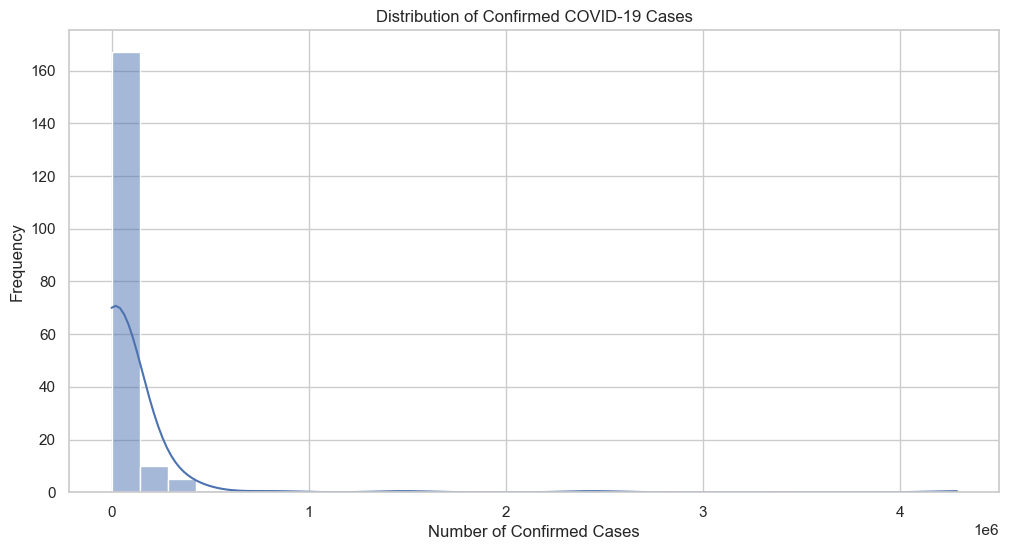

In [13]:
# Visualizing the distribution of confirmed cases
plt.figure(figsize=(12, 6))
sns.histplot(df['Confirmed'], bins=30, kde=True)
plt.title('Distribution of Confirmed COVID-19 Cases')
plt.xlabel('Number of Confirmed Cases')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig("histplot of Confirmed Cases.jpg", dpi=400)
plt.show()

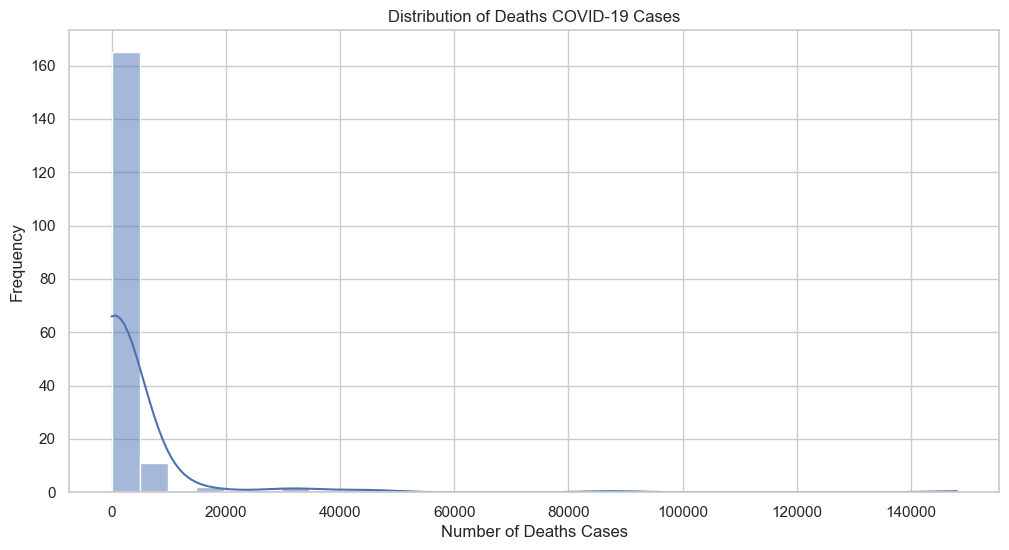

In [14]:
# Visualizing the distribution of confirmed cases
plt.figure(figsize=(12, 6))
sns.histplot(df['Deaths'], bins=30, kde=True)
plt.title('Distribution of Deaths COVID-19 Cases')
plt.xlabel('Number of Deaths Cases')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig("histplot of Deaths Cases.jpg", dpi=400)
plt.show()

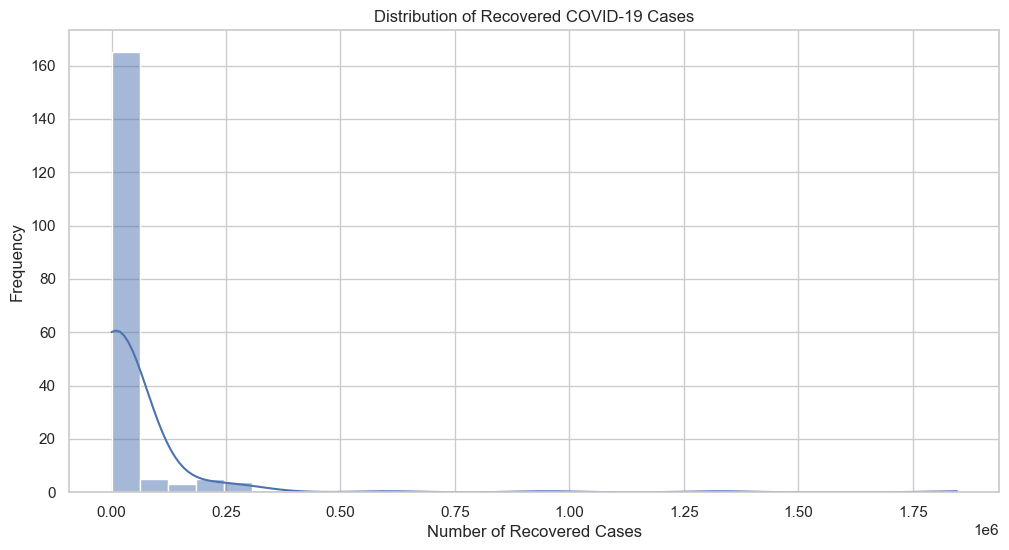

In [15]:
# Visualizing the distribution of confirmed cases
plt.figure(figsize=(12, 6))
sns.histplot(df['Recovered'], bins=30, kde=True)
plt.title('Distribution of Recovered COVID-19 Cases')
plt.xlabel('Number of Recovered Cases')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig("histplot of Recovered Cases.jpg", dpi=400)
plt.show()

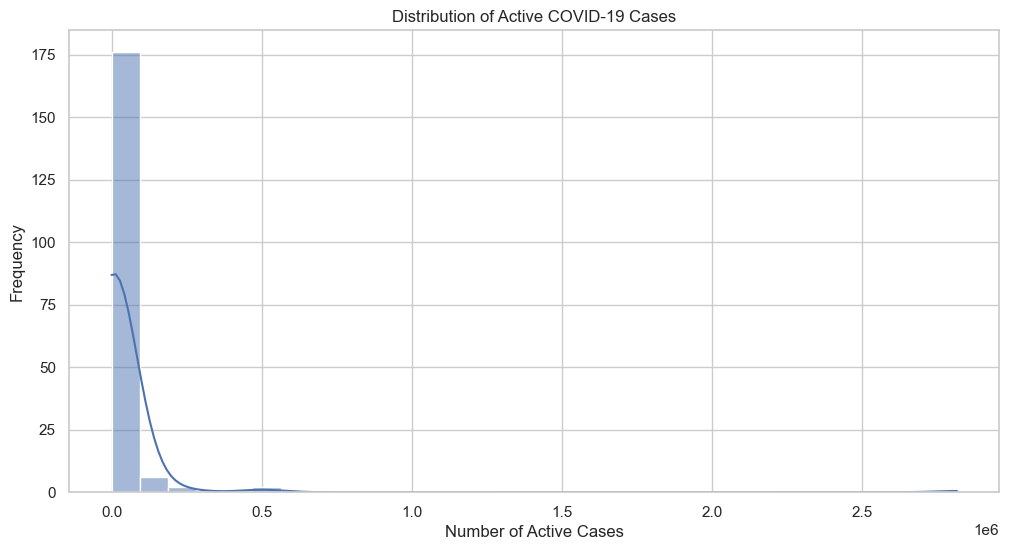

In [16]:
# Visualizing the distribution of confirmed cases
plt.figure(figsize=(12, 6))
sns.histplot(df['Active'], bins=30, kde=True)
plt.title('Distribution of Active COVID-19 Cases')
plt.xlabel('Number of Active Cases')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig("histplot of Active Cases.jpg", dpi=400)
plt.show()

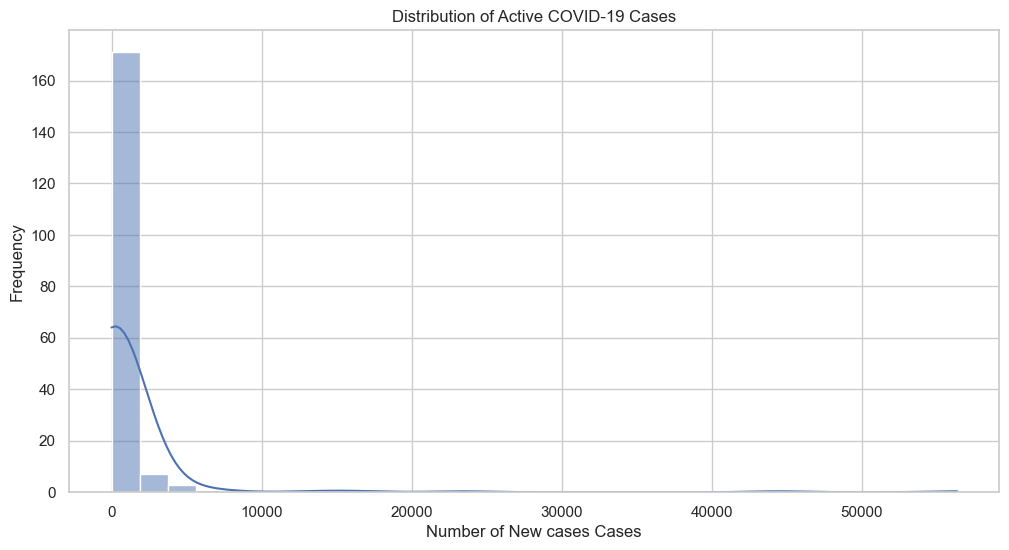

In [17]:
# Visualizing the distribution of confirmed cases
plt.figure(figsize=(12, 6))
sns.histplot(df['New cases'], bins=30, kde=True)
plt.title('Distribution of Active COVID-19 Cases')
plt.xlabel('Number of New cases Cases')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

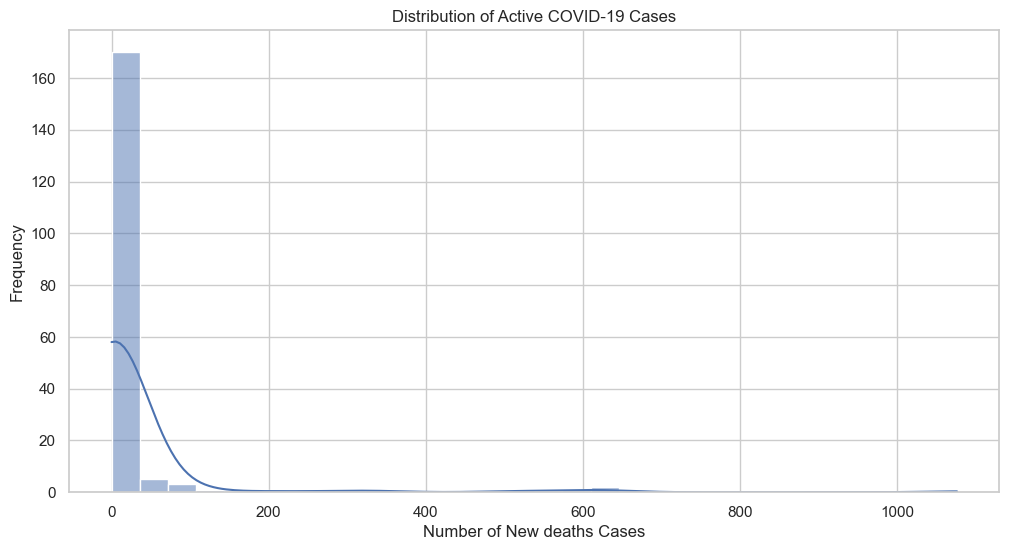

In [18]:
# Visualizing the distribution of confirmed cases
plt.figure(figsize=(12, 6))
sns.histplot(df['New deaths'], bins=30, kde=True)
plt.title('Distribution of Active COVID-19 Cases')
plt.xlabel('Number of New deaths Cases')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

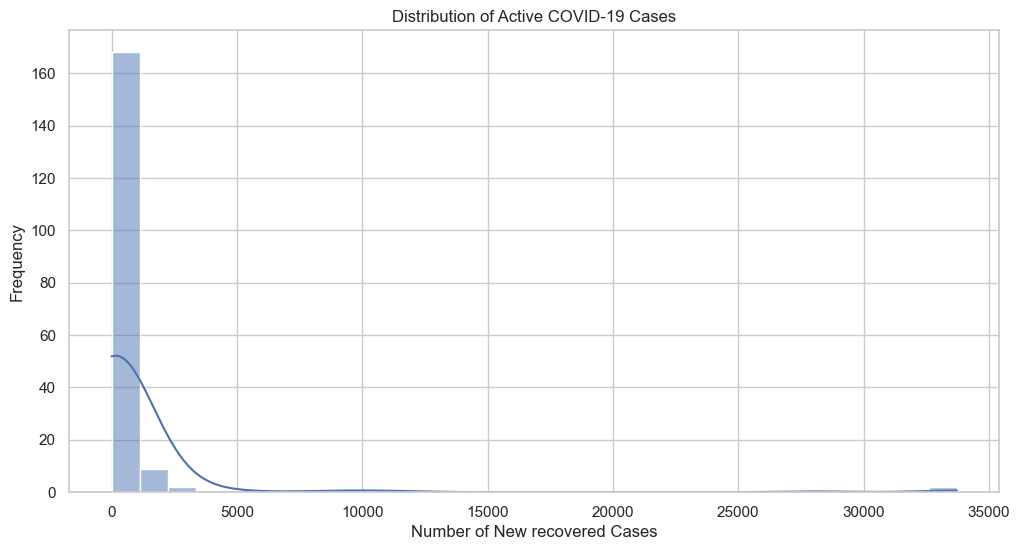

In [19]:
# Visualizing the distribution of confirmed cases
plt.figure(figsize=(12, 6))
sns.histplot(df['New recovered'], bins=30, kde=True)
plt.title('Distribution of Active COVID-19 Cases')
plt.xlabel('Number of New recovered Cases')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\segun\AppData\Local\Temp\ipykernel_21380\3607517655.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20')


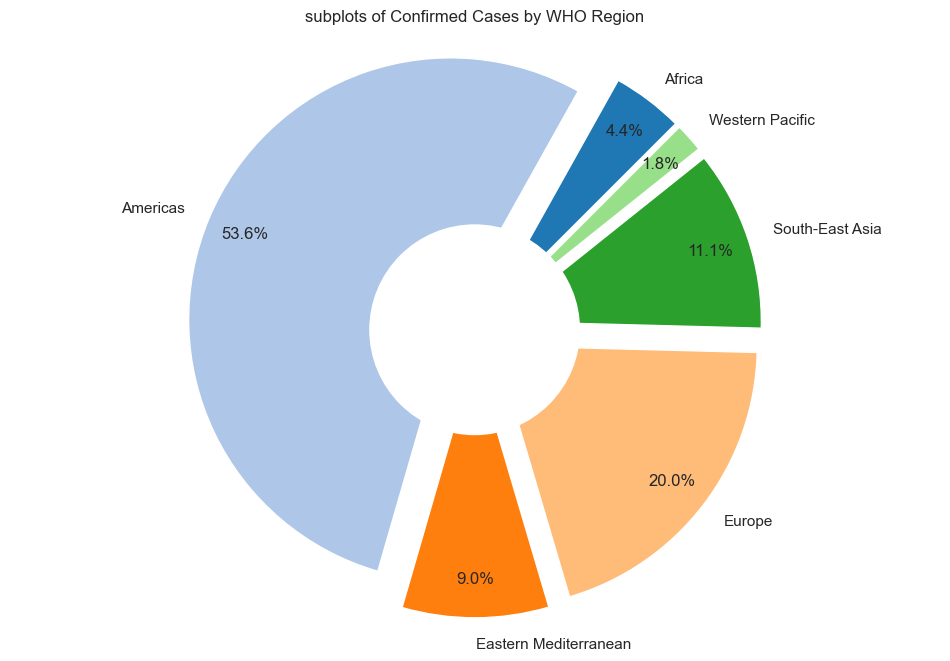

In [20]:
# Assuming df is your DataFrame and 'WHO Region' is the column you're interested in
region_counts = df.groupby('WHO Region')['Confirmed'].sum()

fig, ax = plt.subplots(figsize=(12, 8))

# Create an explode list with a non-zero value for all slices
explode = [0.1] * len(region_counts)  # Explode all slices

# Use a colormap to generate colors
cmap = cm.get_cmap('tab20')
colors = cmap(range(len(region_counts)))

# Create a pie chart with the explode parameter
wedges, texts, autotexts = ax.pie(region_counts.values, labels=region_counts.index, autopct='%1.1f%%', startangle=45, pctdistance=0.85, explode=explode, colors=colors)

# Create a circle at the center to transform it into a donut chart
center_circle = plt.Circle((0, 0), 0.40, fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
plt.title('subplots of Confirmed Cases by WHO Region')
plt.savefig("subplots of Confirmed Cases by WHO Region.jpg", dpi=400)
plt.show()

# Bivariate Analysis

In [22]:
# Analyzing the total confirmed cases, deaths, and recoveries across all countries
summary_stats = df[['Confirmed', 'Deaths', 'Recovered']].sum()

# Displaying the summary statistics
print(summary_stats)

Confirmed    16480485
Deaths         654036
Recovered     9468087
dtype: int64


In [23]:
# Performing a more in-depth analysis of the dataset
# This will include calculating the percentage of deaths and recoveries, as well as analyzing the data by WHO region.

# Adding new columns for death and recovery rates
# Death rate = (Deaths / Confirmed) * 100
# Recovery rate = (Recovered / Confirmed) * 100

# Handle division by zero by setting rates to zero when Confirmed is zero
df['Death Rate (%)'] = df.apply(lambda row: (row['Deaths'] / row['Confirmed']) * 100 if row['Confirmed'] != 0 else 0, axis=1)
df['Recovery Rate (%)'] = df.apply(lambda row: (row['Recovered'] / row['Confirmed']) * 100 if row['Confirmed'] != 0 else 0, axis=1)

# Grouping by WHO Region to get aggregated statistics
region_stats = df.groupby('WHO Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Calculating death and recovery rates after aggregation
# Handle division by zero by setting rates to zero when Confirmed is zero
region_stats['Death Rate (%)'] = region_stats.apply(lambda row: (row['Deaths'] / row['Confirmed']) * 100 if row['Confirmed'] != 0 else 0, axis=1)
region_stats['Recovery Rate (%)'] = region_stats.apply(lambda row: (row['Recovered'] / row['Confirmed']) * 100 if row['Confirmed'] != 0 else 0, axis=1)

# Displaying the aggregated statistics by WHO Region
region_stats

,WHO Region,Confirmed,Deaths,Recovered,Death Rate (%),Recovery Rate (%)
0,Africa,723207,12223,440645,1.690111,60.929305
1,Americas,8839286,342732,4468616,3.877372,50.554038
2,Eastern Mediterranean,1490744,38339,1201400,2.571803,80.590631
3,Europe,3299523,211144,1993723,6.399228,60.424583
4,South-East Asia,1835297,41349,1156933,2.252987,63.037917
5,Western Pacific,292428,8249,206770,2.820865,70.708003


In [24]:
# Sort the DataFrame by the "Confirmed" column in descending order (highest to lowest)
region_stats_Confirmed = region_stats.sort_values(by='Confirmed', ascending=False)

# Reset the index after sorting, if needed
region_stats_Confirmed = region_stats_Confirmed.reset_index(drop=True)

region_stats_Confirmed

,WHO Region,Confirmed,Deaths,Recovered,Death Rate (%),Recovery Rate (%)
0,Americas,8839286,342732,4468616,3.877372,50.554038
1,Europe,3299523,211144,1993723,6.399228,60.424583
2,South-East Asia,1835297,41349,1156933,2.252987,63.037917
3,Eastern Mediterranean,1490744,38339,1201400,2.571803,80.590631
4,Africa,723207,12223,440645,1.690111,60.929305
5,Western Pacific,292428,8249,206770,2.820865,70.708003


# Insights:
Regional Variability: The impact of COVID-19 is significantly variable across different WHO regions. The Americas and Europe have been the most severely affected in terms of confirmed cases and deaths.

Death Rates: The death rates vary widely, with Europe having the highest death rate and Africa the lowest. This could be due to Africa's younger population and potentially lower prevalence of comorbidities like obesity and cardiovascular diseases, which may contribute to lower COVID-19 death rates. Additionally, underreporting due to limited testing and reporting infrastructure in Africa could result in artificially lower reported death rates.

Recovery Rates: The recovery rates also vary, with the Eastern Mediterranean region showing the highest recovery rate. This could indicate effective healthcare responses and management of the pandemic in this region.

C:\Users\segun\AppData\Local\Temp\ipykernel_21380\1844979096.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='WHO Region', y='Confirmed', data=region_stats, palette='viridis')


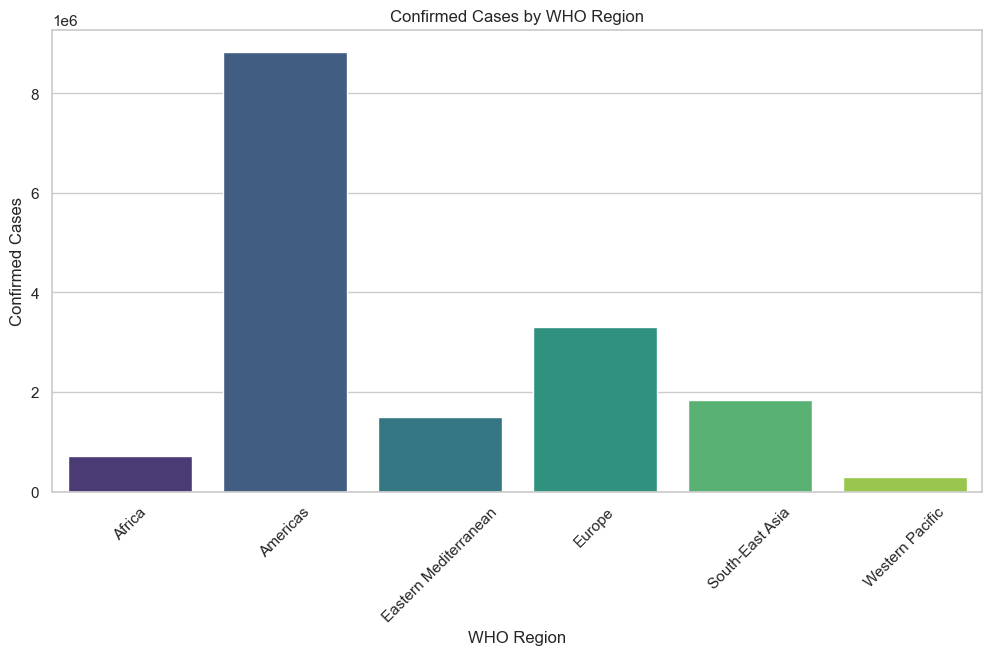

In [26]:
# Bar Plot for Confirmed Cases by WHO Region
plt.figure(figsize=(12, 6))
sns.barplot(x='WHO Region', y='Confirmed', data=region_stats, palette='viridis')
plt.title('Confirmed Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.savefig("Barplot of Confirmed Cases.jpg", dpi=400)
plt.show()

C:\Users\segun\AppData\Local\Temp\ipykernel_21380\743636652.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='WHO Region', y='Deaths', data=region_stats, palette='viridis')


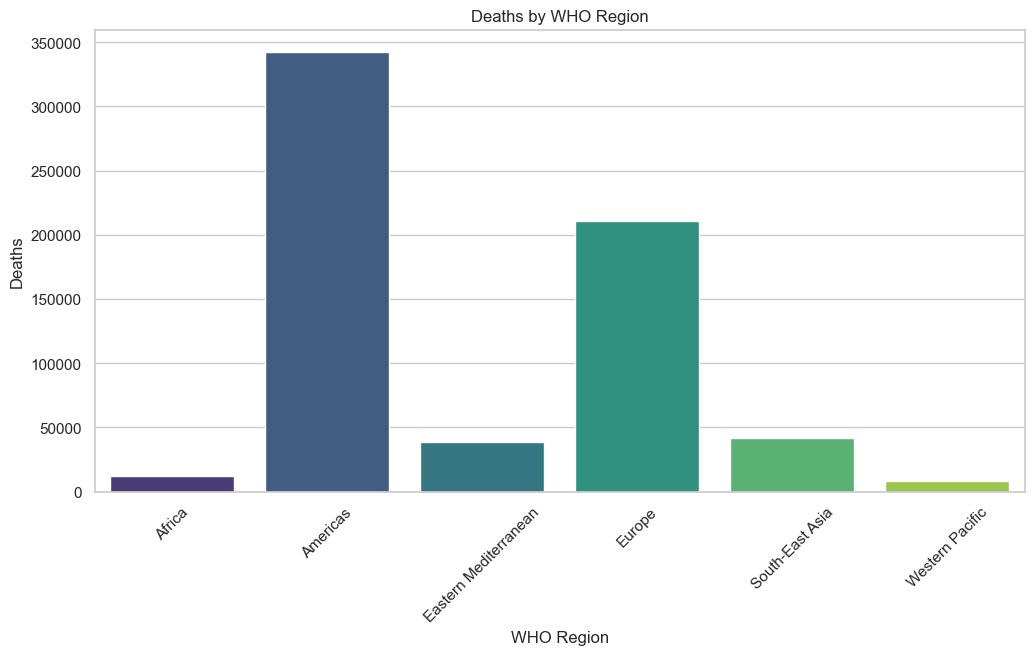

In [27]:
# Bar Plot for Deaths by WHO Region
plt.figure(figsize=(12, 6))
sns.barplot(x='WHO Region', y='Deaths', data=region_stats, palette='viridis')
plt.title('Deaths by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.savefig("Barplot of Deaths Cases.jpg", dpi=400)
plt.show()

C:\Users\segun\AppData\Local\Temp\ipykernel_21380\954582987.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='WHO Region', y='Recovered', data=region_stats, palette='viridis')


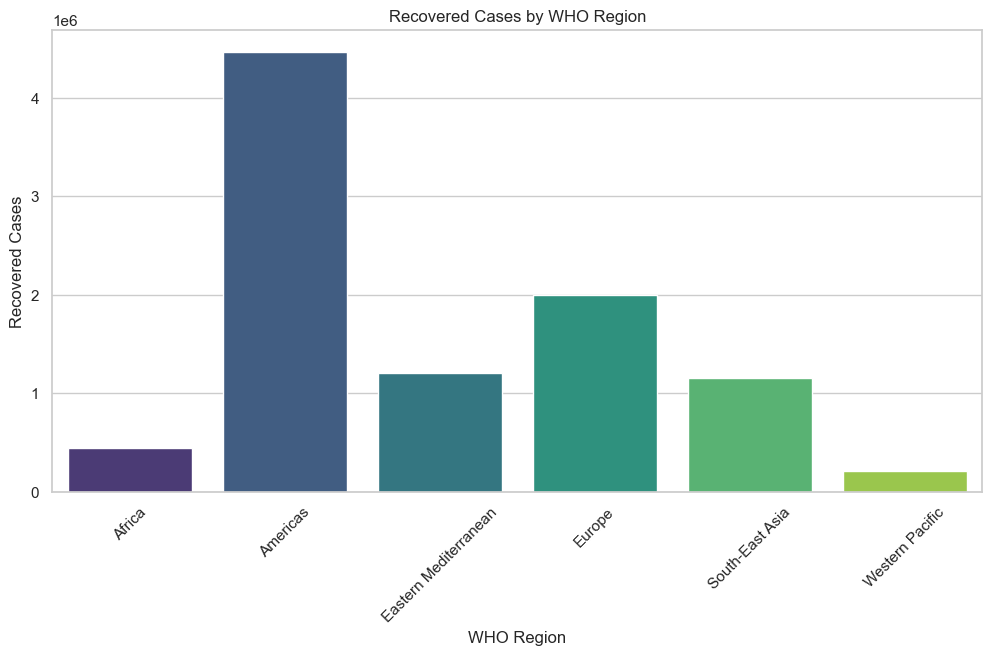

In [28]:
# Bar Plot for Recovered Cases by WHO Region
plt.figure(figsize=(12, 6))
sns.barplot(x='WHO Region', y='Recovered', data=region_stats, palette='viridis')
plt.title('Recovered Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Recovered Cases')
plt.xticks(rotation=45)
plt.show()

C:\Users\segun\AppData\Local\Temp\ipykernel_21380\1335048633.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country/Region', y='Confirmed', data=top10_confirmed, palette='viridis')


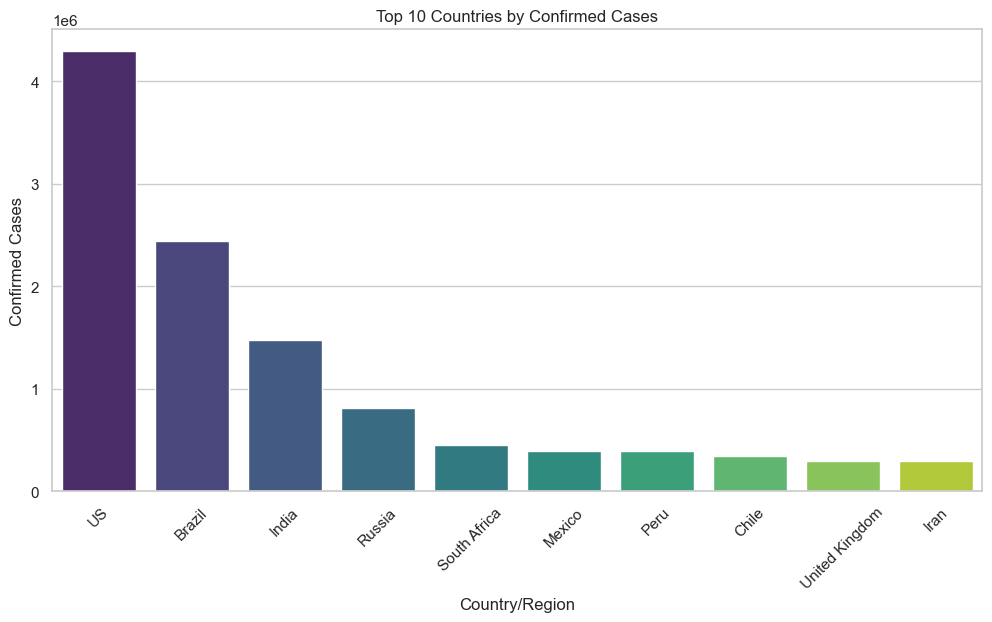

In [29]:
# Top 10 countries by Confirmed cases
top10_confirmed = df[['Country/Region', 'Confirmed']].sort_values(by='Confirmed', ascending=False).head(10).reset_index(drop=True)
# Top 10 Countries by Confirmed Cases Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Country/Region', y='Confirmed', data=top10_confirmed, palette='viridis')
plt.title('Top 10 Countries by Confirmed Cases')
plt.xlabel('Country/Region')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.savefig("Barplot of Confirmed Cases.jpg", dpi=400)
plt.show()

C:\Users\segun\AppData\Local\Temp\ipykernel_21380\3416001743.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country/Region', y='Deaths', data=top10_deaths, palette='viridis')


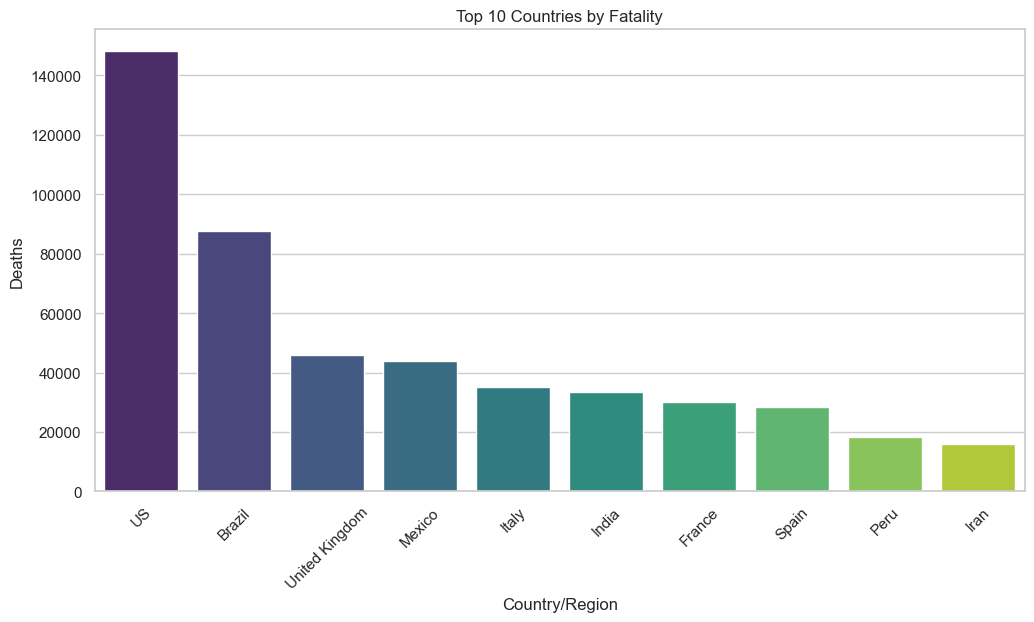

In [30]:
# Top 10 countries by Deaths
top10_deaths = df[['Country/Region', 'Deaths']].sort_values(by='Deaths', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(12, 6))
sns.barplot(x='Country/Region', y='Deaths', data=top10_deaths, palette='viridis')
plt.title('Top 10 Countries by Fatality')
plt.xlabel('Country/Region')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.savefig("Barplot of Deaths Cases.jpg", dpi=400)
plt.show()

C:\Users\segun\AppData\Local\Temp\ipykernel_21380\1263481254.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country/Region', x='Recovery Rate (%)', data=top10_recovery_rate, palette='viridis')


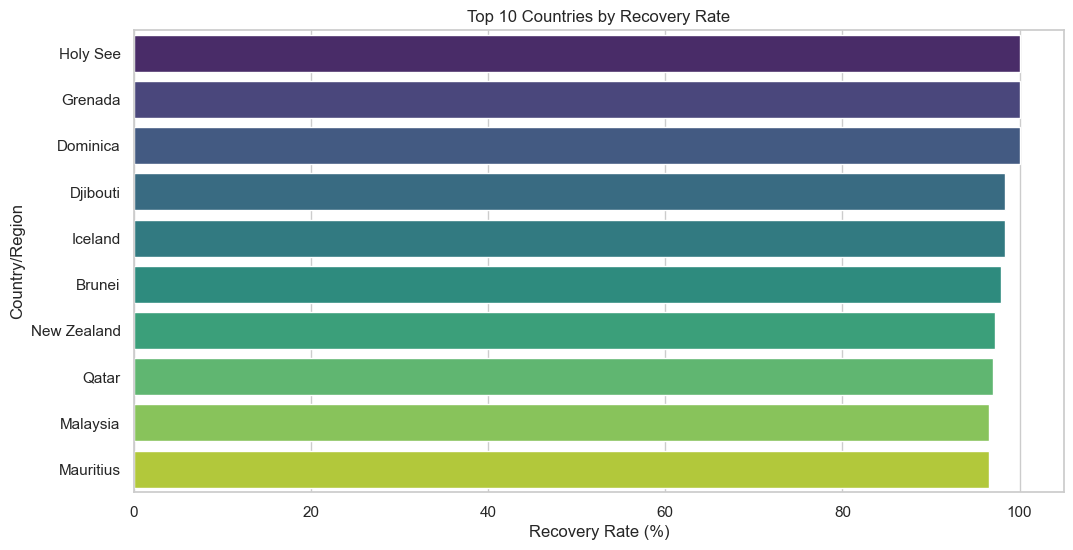

In [31]:
# Top 10 countries by Recovery Rate
df['Recovery Rate (%)'] = (df['Recovered'] / df['Confirmed']) * 100
top10_recovery_rate = df[['Country/Region', 'Recovery Rate (%)']].sort_values(by='Recovery Rate (%)', ascending=False).head(10).reset_index(drop=True)
# Top 10 countries by Death Rate
# Top 10 Countries by Recovery Rate Horizontal Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(y='Country/Region', x='Recovery Rate (%)', data=top10_recovery_rate, palette='viridis')
plt.title('Top 10 Countries by Recovery Rate')
plt.xlabel('Recovery Rate (%)')
plt.ylabel('Country/Region')
plt.show()

C:\Users\segun\AppData\Local\Temp\ipykernel_21380\2981364632.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country/Region', x='Death Rate (%)', data=top10_death_rate, palette='viridis')


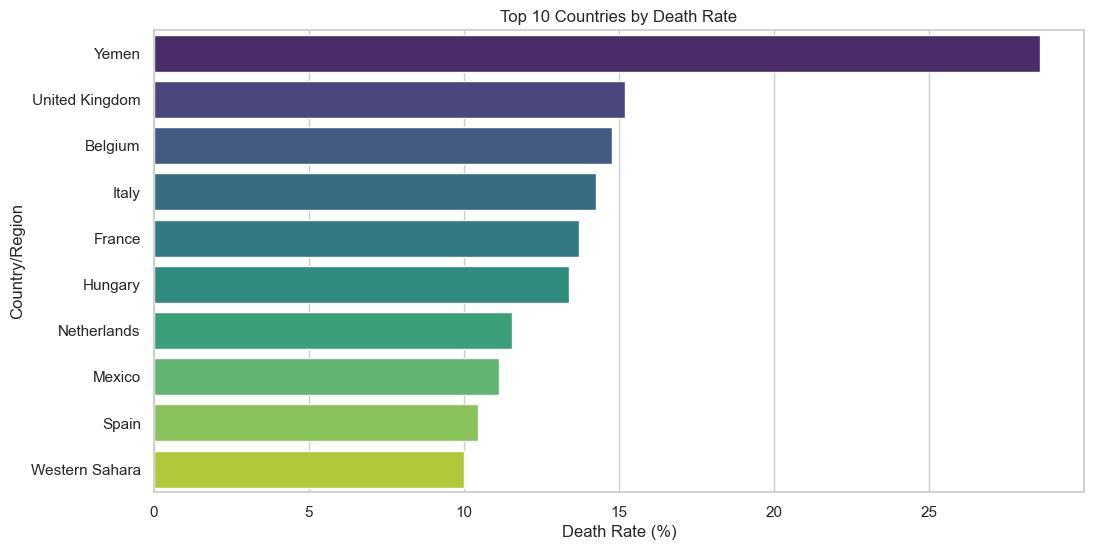

In [32]:
# Top 10 countries by Death Rate
df['Death Rate (%)'] = (df['Deaths'] / df['Confirmed']) * 100
top10_death_rate = df[['Country/Region', 'Death Rate (%)']].sort_values(by='Death Rate (%)', ascending=False).head(10).reset_index(drop=True)
# Top 10 Countries by Recovery Rate Horizontal Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(y='Country/Region', x='Death Rate (%)', data=top10_death_rate, palette='viridis')
plt.title('Top 10 Countries by Death Rate')
plt.xlabel('Death Rate (%)')
plt.ylabel('Country/Region')
plt.show()

# Multivariate Analysis: 

In [34]:
# General statistics
general_stats = pd.DataFrame({
    "Metric": [
        "Total Confirmed Cases",
        "Total Deaths",
        "Total Recovered",
        "Total Active Cases",
        "Mean Confirmed Cases",
        "Mean Deaths",
        "Mean Recoveries",
        "Mean Active Cases"
    ],
    "Value": [
        df['Confirmed'].sum(),
        df['Deaths'].sum(),
        df['Recovered'].sum(),
        df['Active'].sum(),
        df['Confirmed'].mean(),
        df['Deaths'].mean(),
        df['Recovered'].mean(),
        df['Active'].mean()
    ]
}).set_index('Metric')

# Top 10 countries by Confirmed cases
top10_confirmed = df[['Country/Region', 'Confirmed']].sort_values(by='Confirmed', ascending=False).head(10).reset_index(drop=True)

# Top 10 countries by Deaths
top10_deaths = df[['Country/Region', 'Deaths']].sort_values(by='Deaths', ascending=False).head(10).reset_index(drop=True)

# Top 10 countries by Recovery Rate
df['Recovery Rate (%)'] = (df['Recovered'] / df['Confirmed']) * 100
top10_recovery_rate = df[['Country/Region', 'Recovery Rate (%)']].sort_values(by='Recovery Rate (%)', ascending=False).head(10).reset_index(drop=True)

# Top 10 countries by Death Rate
df['Death Rate (%)'] = (df['Deaths'] / df['Confirmed']) * 100
top10_death_rate = df[['Country/Region', 'Death Rate (%)']].sort_values(by='Death Rate (%)', ascending=False).head(10).reset_index(drop=True)

# Display the results
print("General Statistics:\n", general_stats)
print("\nTop 10 Countries by Confirmed Cases:\n", top10_confirmed)
print("\nTop 10 Countries by Deaths:\n", top10_deaths)
print("\nTop 10 Countries by Recovery Rate:\n", top10_recovery_rate)
print("\nTop 10 Countries by Death Rate:\n", top10_death_rate)

General Statistics:
                               Value
Metric                             
Total Confirmed Cases  1.648048e+07
Total Deaths           6.540360e+05
Total Recovered        9.468087e+06
Total Active Cases     6.358362e+06
Mean Confirmed Cases   8.813094e+04
Mean Deaths            3.497519e+03
Mean Recoveries        5.063148e+04
Mean Active Cases      3.400194e+04

Top 10 Countries by Confirmed Cases:
    Country/Region  Confirmed
0              US    4290259
1          Brazil    2442375
2           India    1480073
3          Russia     816680
4    South Africa     452529
5          Mexico     395489
6            Peru     389717
7           Chile     347923
8  United Kingdom     301708
9            Iran     293606

Top 10 Countries by Deaths:
    Country/Region  Deaths
0              US  148011
1          Brazil   87618
2  United Kingdom   45844
3          Mexico   44022
4           Italy   35112
5           India   33408
6          France   30212
7           Spain   284

In [35]:
# Regional Analysis: Distribution of cases and deaths across WHO regions
region_summary = df.groupby('WHO Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

# Adding death rate and recovery rate to the summary
region_summary['Death Rate (%)'] = region_summary.apply(
    lambda row: (row['Deaths'] / row['Confirmed']) * 100 if row['Confirmed'] != 0 else 0, axis=1
)
region_summary['Recovery Rate (%)'] = region_summary.apply(
    lambda row: (row['Recovered'] / row['Confirmed']) * 100 if row['Confirmed'] != 0 else 0, axis=1
)

# Correlation analysis between metrics
correlation_matrix = df[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr()

# Adding death rate to the original DataFrame to identify outliers
df['Death Rate (%)'] = df.apply(
    lambda row: (row['Deaths'] / row['Confirmed']) * 100 if row['Confirmed'] != 0 else 0, axis=1
)

# Sorting the DataFrame by Death Rate (%) in descending order
df_sorted = df.sort_values(by='Death Rate (%)', ascending=False)

# Identifying countries with anomalous death rates (outliers)
outliers_death_rate = df_sorted[(df_sorted['Death Rate (%)'] > 20) | (df_sorted['Death Rate (%)'] < 1)][['Country/Region', 'Death Rate (%)']].reset_index(drop=True)
# Display the results
print("Regional Summary:\n", region_summary)
print("\nCorrelation Matrix:\n", correlation_matrix)
print("\nCountries with Anomalous Death Rates:\n", outliers_death_rate)

Regional Summary:
               WHO Region  Confirmed  Deaths  Recovered   Active  \
0                 Africa     723207   12223     440645   270339   
1               Americas    8839286  342732    4468616  4027938   
2  Eastern Mediterranean    1490744   38339    1201400   251005   
3                 Europe    3299523  211144    1993723  1094656   
4        South-East Asia    1835297   41349    1156933   637015   
5        Western Pacific     292428    8249     206770    77409   

   Death Rate (%)  Recovery Rate (%)  
0        1.690111          60.929305  
1        3.877372          50.554038  
2        2.571803          80.590631  
3        6.399228          60.424583  
4        2.252987          63.037917  
5        2.820865          70.708003  

Correlation Matrix:
            Confirmed    Deaths  Recovered    Active
Confirmed   1.000000  0.934698   0.906377  0.927018
Deaths      0.934698  1.000000   0.832098  0.871586
Recovered   0.906377  0.832098   1.000000  0.682103
Active  

In [36]:
outliers_death_rate

,Country/Region,Death Rate (%)
0,Yemen,28.562980
1,Paraguay,0.945471
2,Cabo Verde,0.945017
3,Madagascar,0.939112
4,Jordan,0.935374
5,Venezuela,0.913185
6,Tajikistan,0.829302
7,Belarus,0.799988
8,Israel,0.740799
9,West Bank and Gaza,0.734394


# Quick Statement Summary
The regional summary shows significant variability in COVID-19 impacts across WHO regions. The Americas have the highest confirmed cases (8.8 million) and deaths (342,732), while Africa has the lowest death rate (1.69%). Europe has the highest death rate (6.40%), and the Eastern Mediterranean has the highest recovery rate (80.59%). Correlation analysis indicates strong relationships between confirmed cases, deaths, recoveries, and active cases. Several countries, including Bahrain, Belarus, and Bhutan, exhibit anomalously low death rates, with Yemen having the highest at 28.56%.

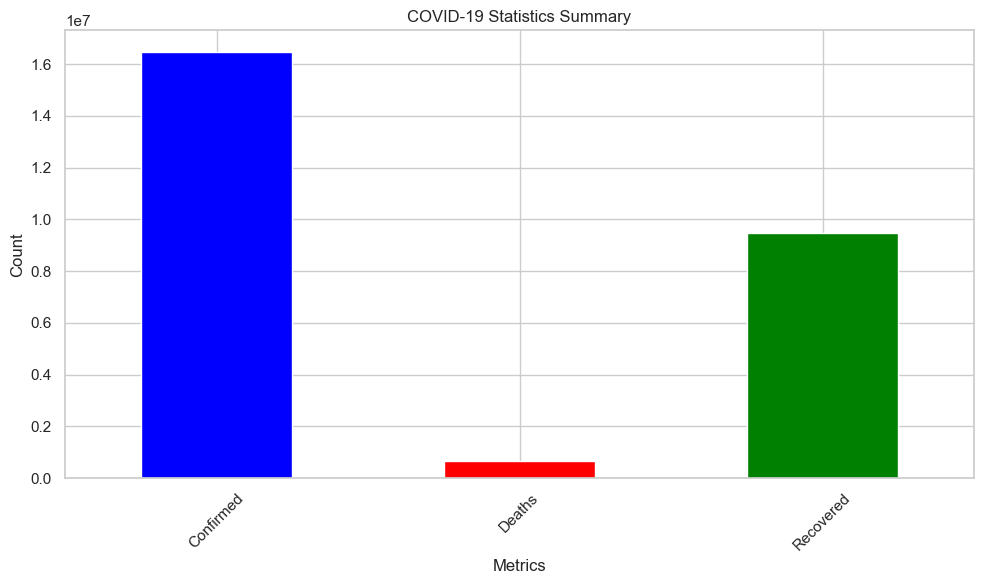

In [38]:
# Creating a bar plot for confirmed cases, deaths, and recoveries
plt.figure(figsize=(10, 6))
summary_stats.plot(kind='bar', color=['blue', 'red', 'green'])
plt.title('COVID-19 Statistics Summary')
plt.xlabel('Metrics')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Bar of Deaths Cases.jpg", dpi=400)
# Displaying the plot
plt.show()

C:\Users\segun\AppData\Local\Temp\ipykernel_21380\3659075251.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=general_stats.index, y=general_stats['Value'], palette='viridis')


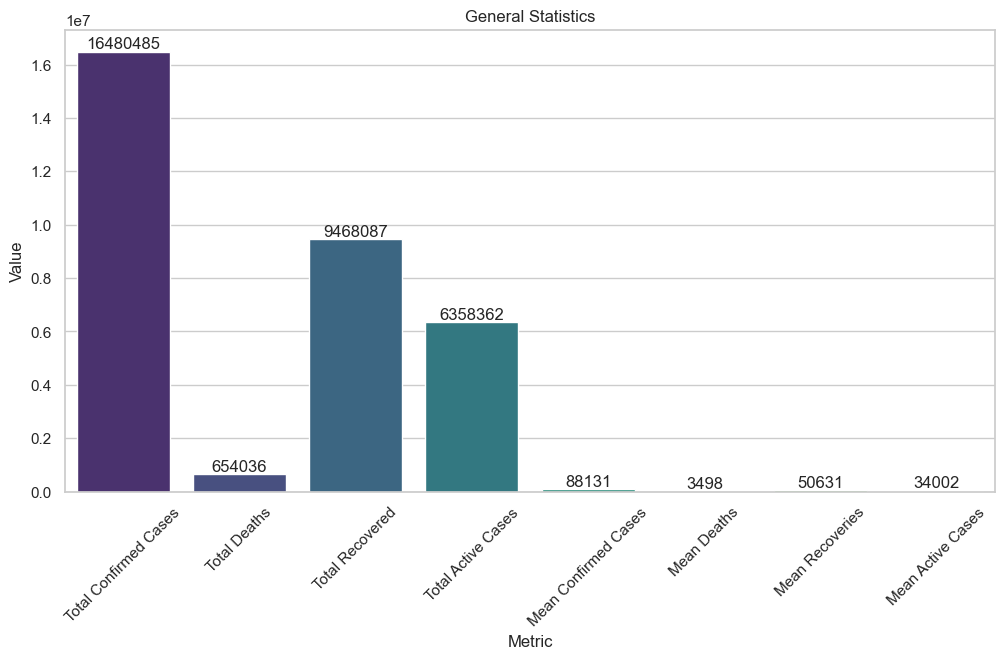

In [39]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(x=general_stats.index, y=general_stats['Value'], palette='viridis')

# Adding annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height + 0.5,
            '{:.0f}'.format(height),
            horizontalalignment='center',
            verticalalignment='bottom')

plt.title('General Statistics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

<Figure size 1400x800 with 0 Axes>

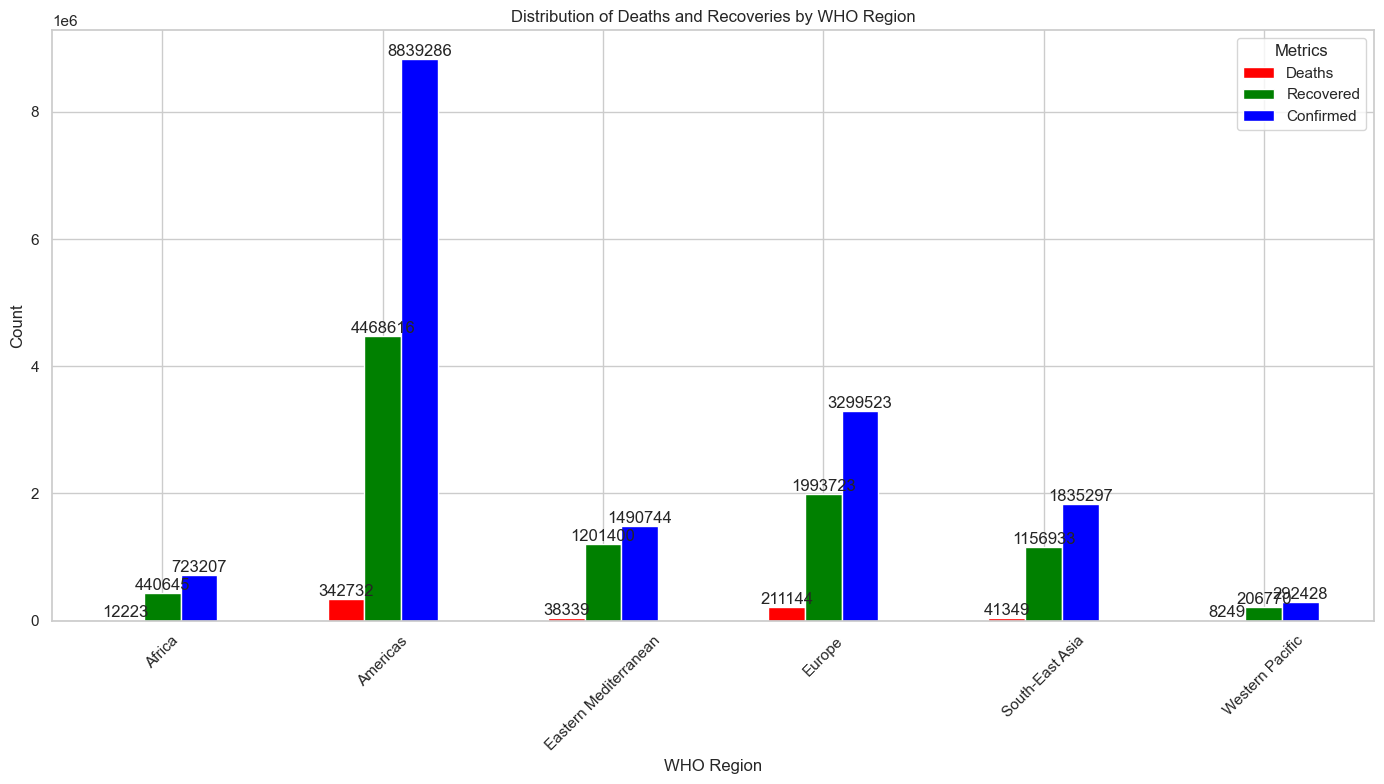

In [40]:
# Grouped Bar Plot for Deaths and Recoveries by WHO Region
plt.figure(figsize=(14, 8))
ax = region_summary.set_index('WHO Region')[['Deaths', 'Recovered', 'Confirmed']].plot(kind='bar', figsize=(14, 8), color=['red', 'green', 'blue'])

# Adding annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height + 0.5,
            '{:.0f}'.format(height),
            horizontalalignment='center',
            verticalalignment='bottom')

plt.title('Distribution of Deaths and Recoveries by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Metrics', labels=['Deaths', 'Recovered', 'Confirmed'])
plt.tight_layout()
plt.savefig("Distribution of Deaths and Recoveries by WHO Region.jpg", dpi=400)
plt.show()

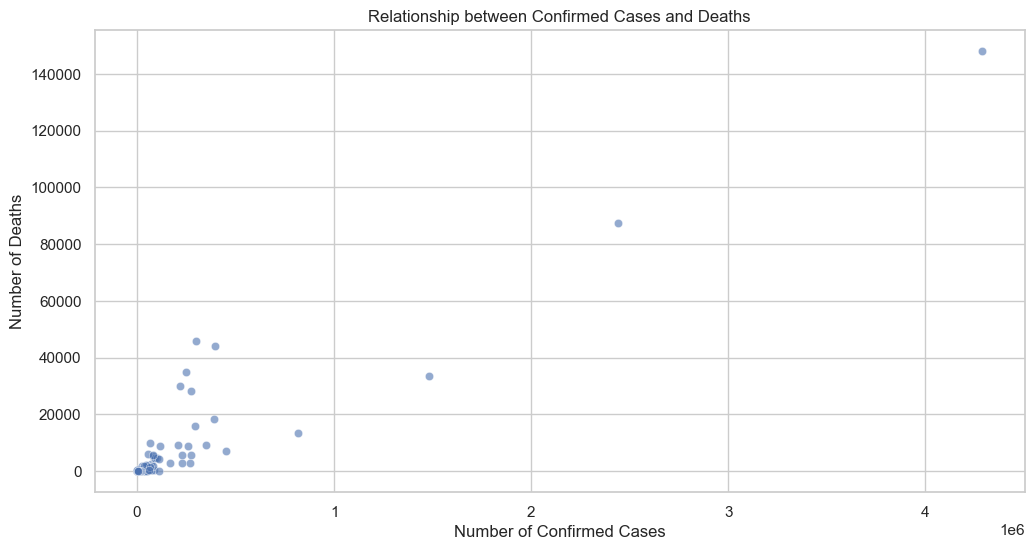

In [41]:
# Visualizing the relationship between confirmed cases and deaths
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Confirmed', y='Deaths', alpha=0.6)
plt.title('Relationship between Confirmed Cases and Deaths')
plt.xlabel('Number of Confirmed Cases')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()

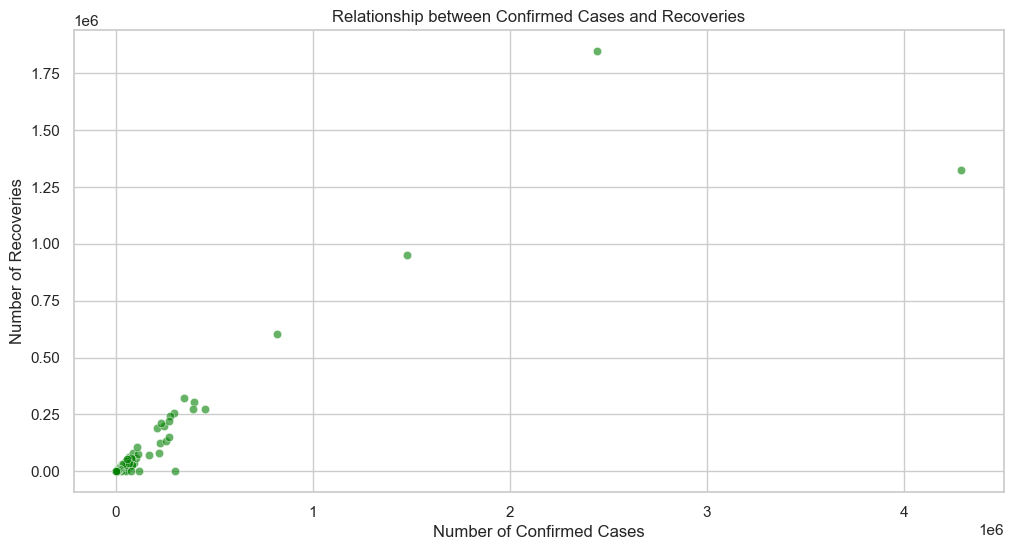

In [42]:
# Visualizing the relationship between confirmed cases and recoveries
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Confirmed', y='Recovered', alpha=0.6, color='green')
plt.title('Relationship between Confirmed Cases and Recoveries')
plt.xlabel('Number of Confirmed Cases')
plt.ylabel('Number of Recoveries')
plt.grid(True)
plt.show()

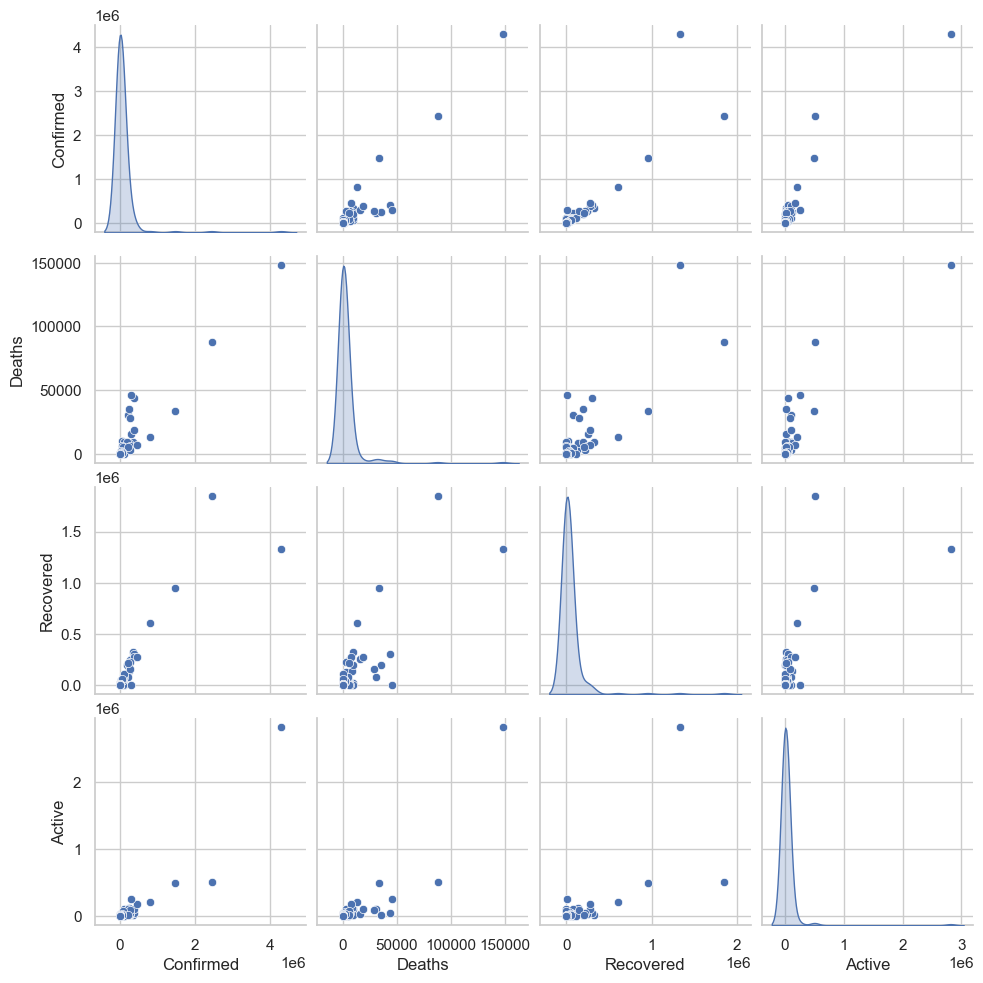

In [43]:
# Assuming df is your DataFrame
sns.pairplot(df, vars=['Confirmed', 'Deaths', 'Recovered','Active'], kind='scatter', diag_kind='kde')
plt.show()

# The pairplot reveals several insights:

There is a clear positive correlation between confirmed cases and deaths, as well as between confirmed cases and recoveries.
The distribution of active cases also shows a similar trend, indicating that countries with higher confirmed cases tend to have more active cases.
If you would like to explore specific aspects of the data further or conduct additional analyses, please let me know!

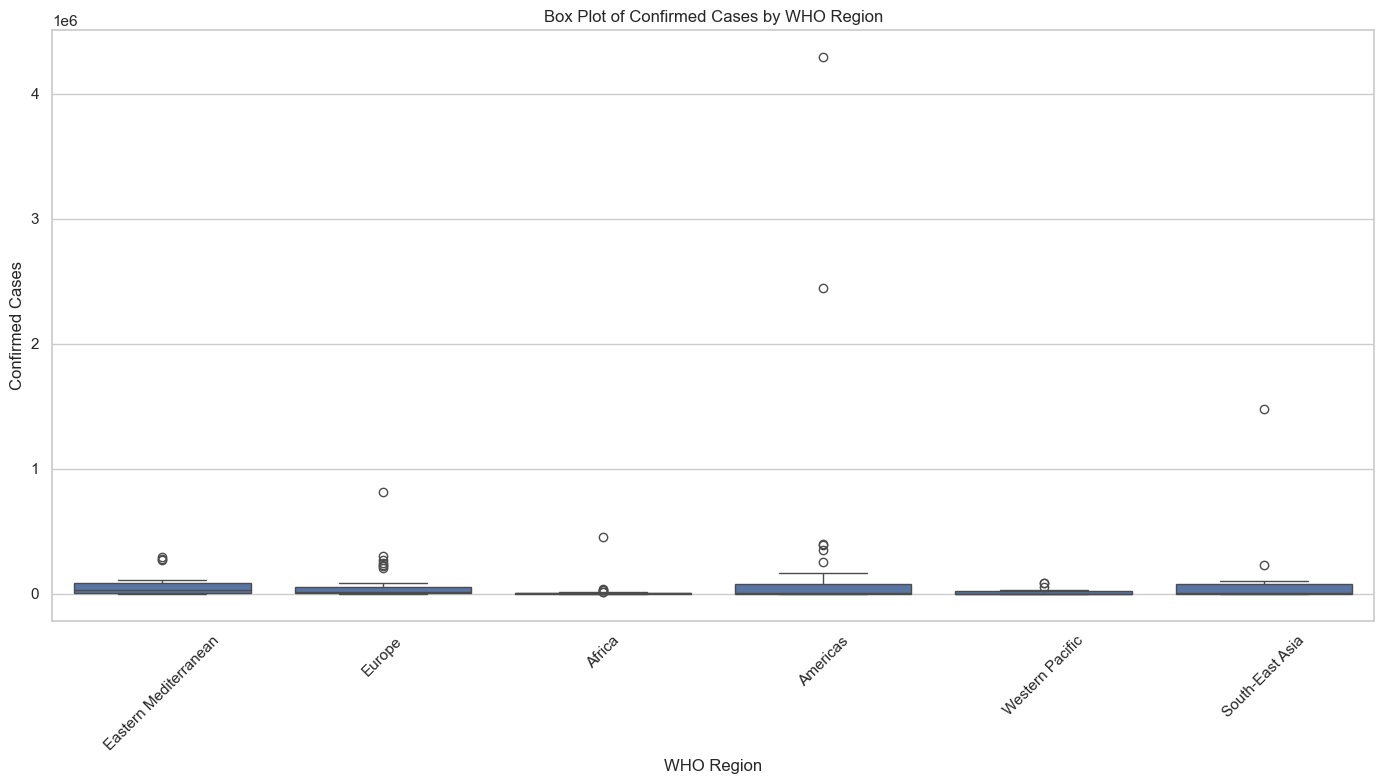

In [45]:
# Box Plot for Confirmed Cases by WHO Region
plt.figure(figsize=(14, 8))
sns.boxplot(x='WHO Region', y='Confirmed', data=df)
plt.title('Box Plot of Confirmed Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

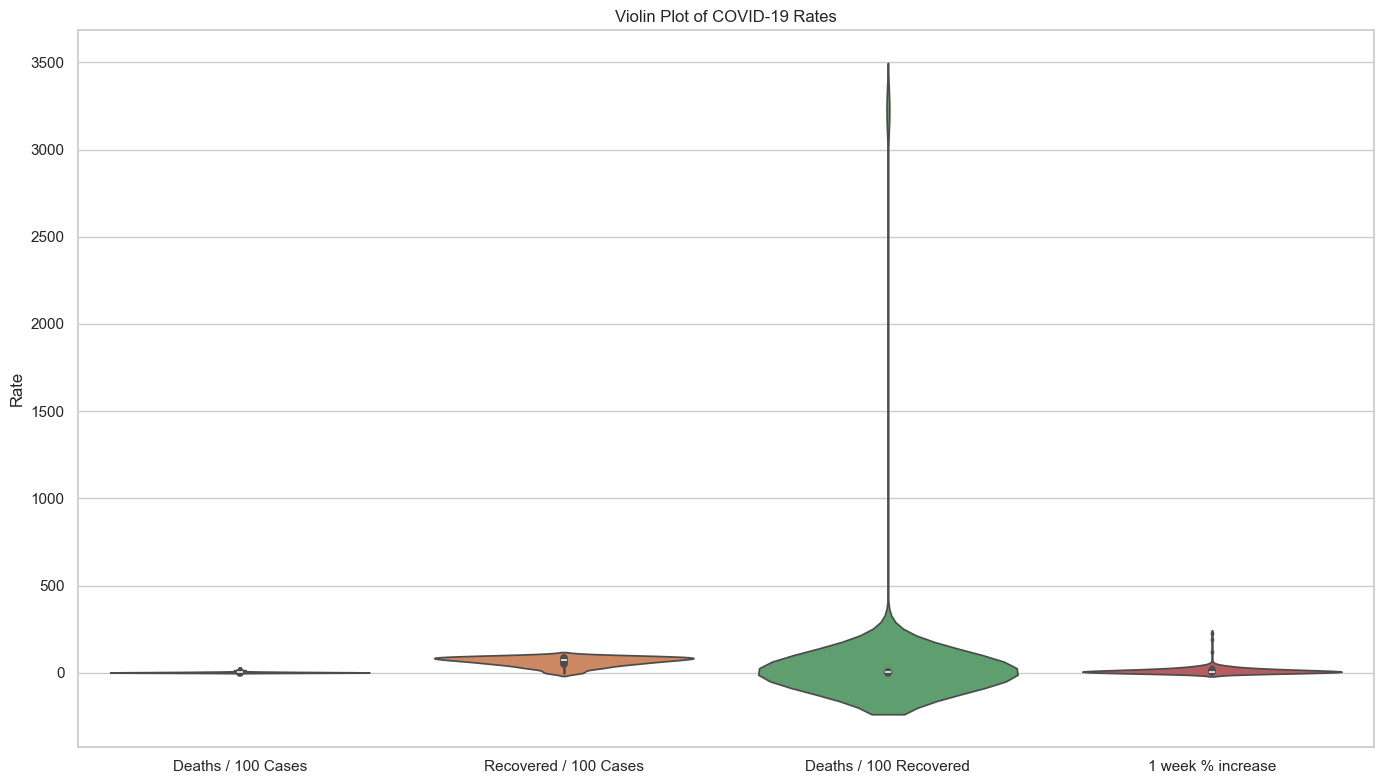

In [46]:
# Violin Plot for Death Rate and Recovery Rate
plt.figure(figsize=(14, 8))
sns.violinplot(data=df[['Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', '1 week % increase']])
plt.title('Violin Plot of COVID-19 Rates')
plt.ylabel('Rate')
plt.tight_layout()
plt.show()

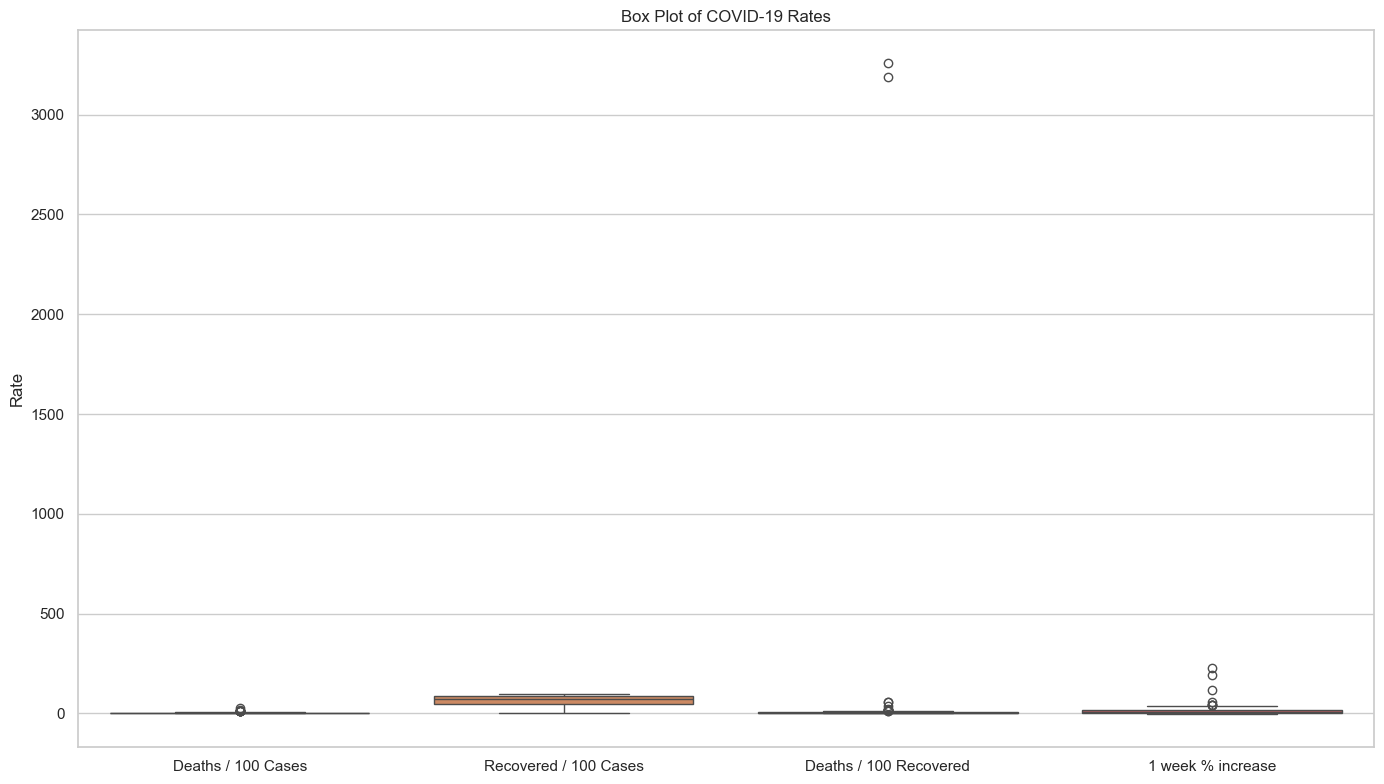

In [47]:
# Box Plot for Death Rate and Recovery Rate
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[['Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', '1 week % increase']])
plt.title('Box Plot of COVID-19 Rates')
plt.ylabel('Rate')
plt.tight_layout()
plt.show()

C:\Users\segun\AppData\Local\Temp\ipykernel_21380\4138918369.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20')


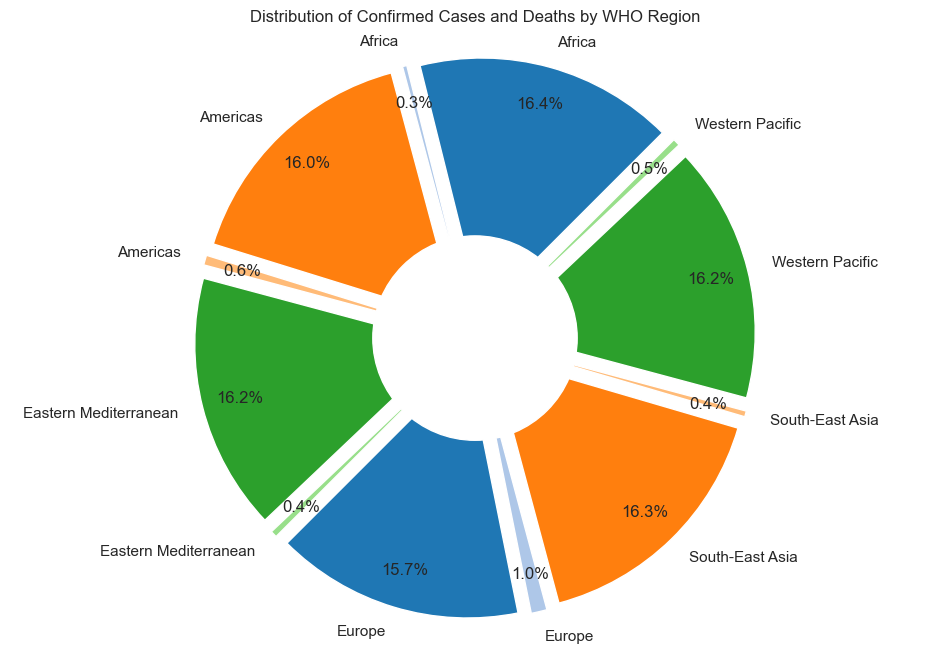

In [48]:
# visualize 'Confirmed' and 'Deaths' by 'WHO Region'
region_data = df.groupby('WHO Region')[['Confirmed', 'Deaths']].sum()

# Normalize the data to get proportions
region_data_norm = region_data.div(region_data.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(12, 8))

# Create an explode list with a non-zero value for all slices
explode = [0.1] * len(region_data)  # Explode all slices

# Use a colormap to generate colors
cmap = cm.get_cmap('tab20')
colors = cmap(range(len(region_data)))

# Create a nested pie chart
wedges, texts, autotexts = ax.pie(region_data_norm.values.flatten(), labels=region_data_norm.index.repeat(2), autopct='%1.1f%%', startangle=45, pctdistance=0.85, explode=explode*2, colors=colors)

# Create a circle at the center to transform it into a donut chart
center_circle = plt.Circle((0, 0), 0.40, fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
plt.title('Distribution of Confirmed Cases and Deaths by WHO Region')
plt.savefig("Distribution of Confirmed Cases and Deaths by WHO Region.jpg", dpi=400)
plt.show()


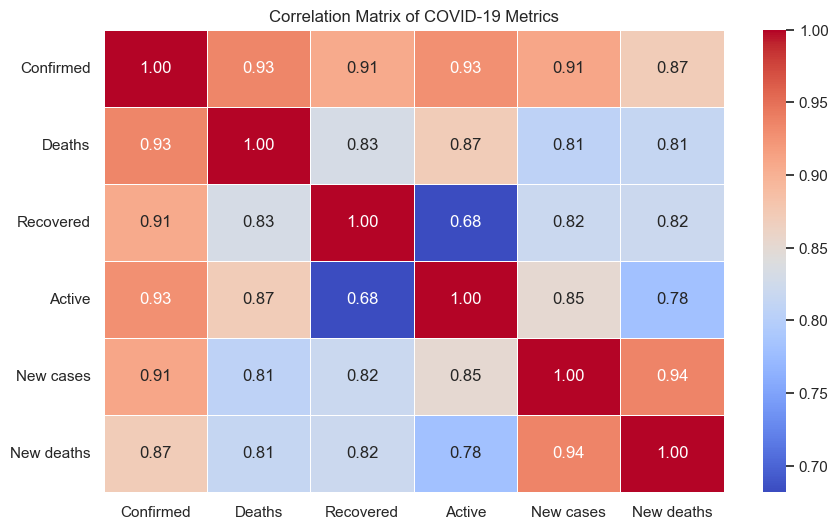

In [49]:
# Calculating the correlation matrix for the relevant metrics in the dataset
correlation_matrix = df[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths']].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of COVID-19 Metrics')
plt.show()

# Explalnation
From the heatmap, we can observe:

A strong positive correlation between confirmed cases and deaths, indicating that as confirmed cases increase, deaths also tend to increase.
A strong positive correlation between confirmed cases and recoveries, suggesting that higher case counts are associated with more recoveries.
The correlation between deaths and recoveries is weaker, indicating that not all recoveries are directly related to the number of deaths.

# predictive model

In [52]:
# Select relevant columns
numeric_cols = ['Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered',
                'Confirmed last week', '1 week change', '1 week % increase']
categorical_cols = ['WHO Region']

# Define the target variable
target = 'Confirmed'

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check for extremely large values
print("Descriptive statistics:\n", df.describe())

Missing values:
 Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
Death Rate (%)            0
Recovery Rate (%)         0
dtype: int64
Descriptive statistics:
           Confirmed         Deaths     Recovered        Active     New cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4

In [53]:
# Ensure there are no extremely large values
for col in numeric_cols:
    df[col] = np.where(df[col] > 1e10, df[col].mean(), df[col])

# Separate features (X) and the target variable (y)
X = df.drop(columns=['Country/Region', 'Confirmed'])
y = df[target]

In [54]:
# Define the preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [55]:
# Define the model pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(random_state=42))])

In [56]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_features': ['sqrt', 'log2'],
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__bootstrap': [True, False],
    'regressor__min_weight_fraction_leaf': [0.0, 0.01, 0.02],
    'regressor__max_leaf_nodes': [None, 10, 20, 30],
    'regressor__ccp_alpha': [0.0, 0.01, 0.02]
}

In [57]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model with RandomizedSearchCV
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Deaths',
                                                                                'Recovered',
                                                                                'Active',
                                                                                'New '
                                                                                'cases',
                                                                                'New '
                                                                                'deaths',
                                                                                'New '
                                                                                'recovered',
                                                                                'Confirmed '
                                                                                'last '
                                                                                'week',
                                                                                '1 '
                                                                                'week '
                                                                                'change',
                                                                                '1 '
                                                                                'week '
                                                                                '% '
                                                                                'increase']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unk...
                                        'regressor__ccp_alpha': [0.0, 0.01,
                                                                 0.02],
                                        'regressor__max_depth': [10, 20, 30,
                                                                 None],
                                        'regressor__max_features': ['sqrt',
                                                                    'log2'],
                                        'regressor__max_leaf_nodes': [None, 10,
                                                                      20, 30],
                                        'regressor__min_samples_leaf': [1, 2,
                                                                        4],
                                        'regressor__min_samples_split': [2, 5,
                                                                         10],
                                        'regressor__min_weight_fraction_leaf': [0.0,
                                                                                0.01,
                                                                                0.02],
                                        'regressor__n_estimators': [100, 200,
                                                                    300]},
                   random_state=42, verbose=2)

In [58]:
# Make predictions
y_pred = random_search.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'Best Parameters: {random_search.best_params_}')

Mean Squared Error (MSE): 2209244513.201462
Root Mean Squared Error (RMSE): 47002.60113229333
Mean Absolute Error (MAE): 13152.535063247838
R-squared (R²): 0.9171769734135651
Mean Absolute Percentage Error (MAPE): 213.5227228787135%
Best Parameters: {'regressor__n_estimators': 200, 'regressor__min_weight_fraction_leaf': 0.02, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 1, 'regressor__max_leaf_nodes': None, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 10, 'regressor__ccp_alpha': 0.02, 'regressor__bootstrap': True}


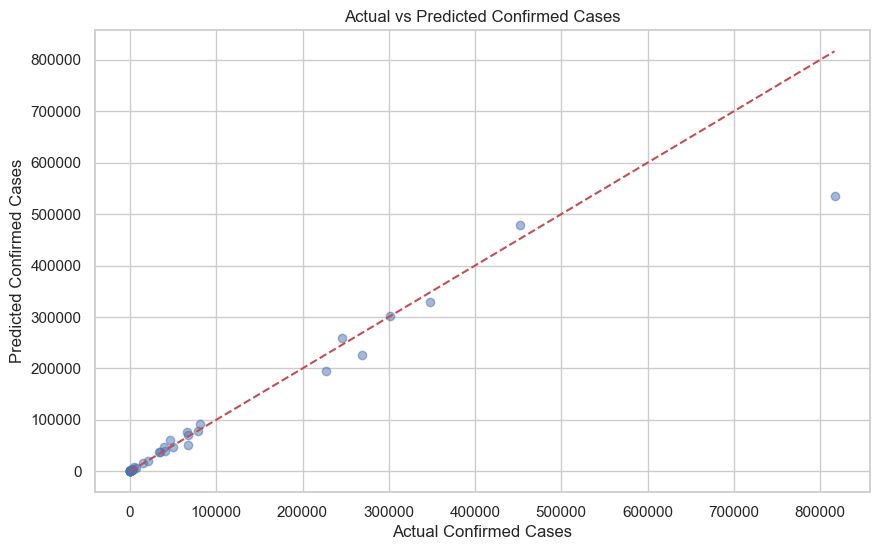

In [59]:
# Optionally, you can visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Confirmed Cases')
plt.ylabel('Predicted Confirmed Cases')
plt.title('Actual vs Predicted Confirmed Cases')
plt.savefig("Actual vs Predicted Confirmed Cases.jpg", dpi=400)
plt.show()

                             Feature  Importance
1                          Recovered    0.163419
6                Confirmed last week    0.133356
5                      New recovered    0.131950
3                          New cases    0.128745
2                             Active    0.123803
0                             Deaths    0.109989
4                         New deaths    0.108821
7                      1 week change    0.089485
8                  1 week % increase    0.006768
10               WHO Region_Americas    0.002798
9                  WHO Region_Africa    0.000577
12                 WHO Region_Europe    0.000109
11  WHO Region_Eastern Mediterranean    0.000100
13        WHO Region_South-East Asia    0.000069
14        WHO Region_Western Pacific    0.000009


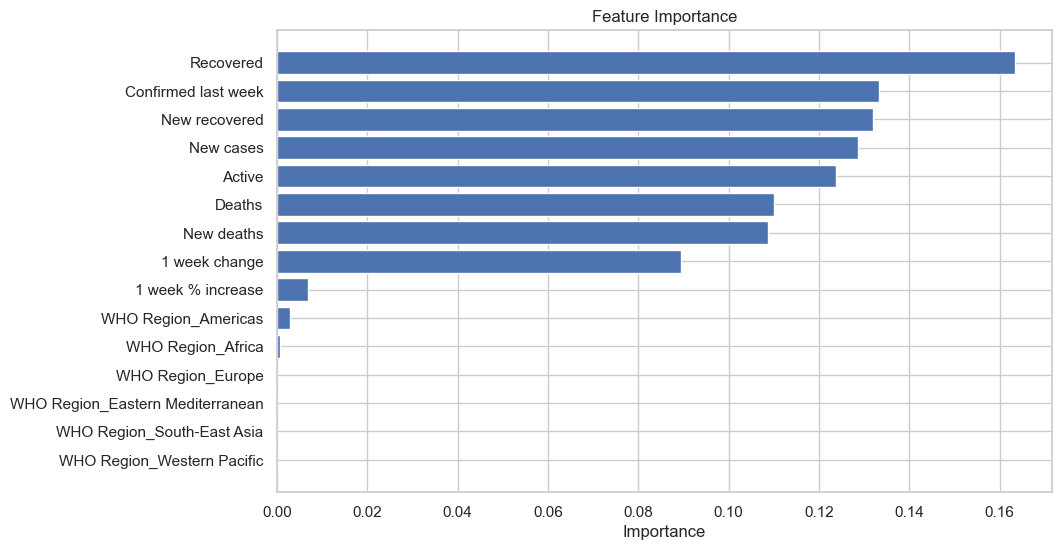

In [60]:
# Retrieve feature importance from the best model
best_model = random_search.best_estimator_.named_steps['regressor']

# Get the feature names after fitting the pipeline
numeric_features = numeric_cols  # These remain the same
categorical_features = random_search.best_estimator_.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols)

# Combine numeric and categorical features
all_features = list(numeric_features) + list(categorical_features)

# Feature importance
importances = best_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Optionally, you can visualize the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.savefig("Feature Importances.jpg", dpi=400)
plt.show()

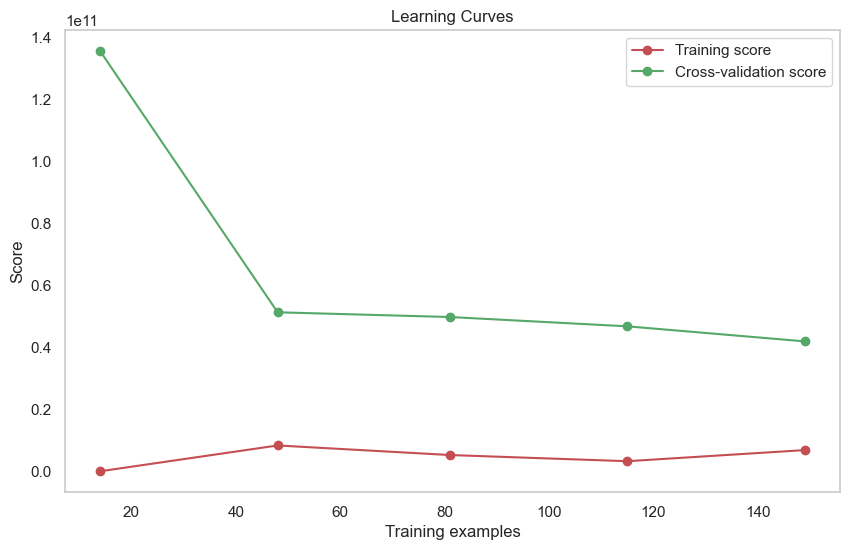

In [61]:
from sklearn.model_selection import learning_curve

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(pipeline, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid()
plt.show()